In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
data_jualan = pd.read_csv("data_penjualan.csv",delimiter=";")
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,05/08/2022,Foodpak260,1000,1800,1800000
1,05/08/2022,FoodpakMatte245,1000,1900,1900000
2,05/08/2022,CraftLaminasi290,5000,750,3750000
3,05/08/2022,CraftLaminasi290,1000,1200,1200000
4,07/08/2022,Dupleks310,1000,1550,1550000
...,...,...,...,...,...
1071,14/11/2023,Ivory230,1000,900,900000
1072,15/11/2023,CraftLaminasi290,2000,800,1600000
1073,15/11/2023,CraftLaminasi290,1500,875,1312500
1074,15/11/2023,FoodpakMatte,1000,2200,2200000


#Tugas
1. Analisa penjualan setiap bulan dari produk kalian -- jumlah penjualan setiap bulan
2. Visualisasikan pendapatan tertinggi setiap bulannya.Hitung total pendapatan produk setiap bulan ---- list {"Januari":20000;"Februari":300000}--- visualisasikan
3. Beri legenda pada setiap visualisasi

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt

In [6]:
produk_dupleks350 = data_jualan[data_jualan["Jenis Produk"]=="Dupleks350"]
produk_dupleks350

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
9,09/08/2022,Dupleks350,500,1800,900000
10,09/08/2022,Dupleks350,500,1800,900000
14,11/08/2022,Dupleks350,500,1800,900000
15,11/08/2022,Dupleks350,500,1800,900000
19,12/08/2022,Dupleks350,1000,2200,2200000
...,...,...,...,...,...
1059,11/11/2023,Dupleks350,1000,1700,1700000
1060,11/11/2023,Dupleks350,3500,2000,7000000
1061,11/11/2023,Dupleks350,3500,1900,6650000
1062,11/11/2023,Dupleks350,3000,1600,4800000


In [7]:
data_jualan.isna().sum()

Tanggal         0
Jenis Produk    0
Jumlah Order    0
Harga           0
Total           0
dtype: int64

In [8]:
produk_dupleks350 = produk_dupleks350.copy()

In [9]:
produk_dupleks350["Tanggal"] = pd.to_datetime(produk_dupleks350["Tanggal"],errors='coerce')

In [10]:
produk_dupleks350

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
9,2022-09-08,Dupleks350,500,1800,900000
10,2022-09-08,Dupleks350,500,1800,900000
14,2022-11-08,Dupleks350,500,1800,900000
15,2022-11-08,Dupleks350,500,1800,900000
19,2022-12-08,Dupleks350,1000,2200,2200000
...,...,...,...,...,...
1059,2023-11-11,Dupleks350,1000,1700,1700000
1060,2023-11-11,Dupleks350,3500,2000,7000000
1061,2023-11-11,Dupleks350,3500,1900,6650000
1062,2023-11-11,Dupleks350,3000,1600,4800000


In [11]:
produk_dupleks350["Bulan"] = produk_dupleks350["Tanggal"].dt.month_name()

In [12]:
produk_dupleks350

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan
9,2022-09-08,Dupleks350,500,1800,900000,September
10,2022-09-08,Dupleks350,500,1800,900000,September
14,2022-11-08,Dupleks350,500,1800,900000,November
15,2022-11-08,Dupleks350,500,1800,900000,November
19,2022-12-08,Dupleks350,1000,2200,2200000,December
...,...,...,...,...,...,...
1059,2023-11-11,Dupleks350,1000,1700,1700000,November
1060,2023-11-11,Dupleks350,3500,2000,7000000,November
1061,2023-11-11,Dupleks350,3500,1900,6650000,November
1062,2023-11-11,Dupleks350,3000,1600,4800000,November


In [13]:
penjualan_bulanan = produk_dupleks350.groupby("Bulan").agg(
jumlah_penjualan=("Jumlah Order", "sum"),
total_pendapatan = ("Total","sum")
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [14]:
penjualan_bulanan

,jumlah_penjualan,total_pendapatan
Bulan,,
January,1000.0,2250000.0
February,8000.0,14150000.0
March,3000.0,6200000.0
April,NaN,NaN
May,7000.0,14500000.0
June,12000.0,24200000.0
July,3000.0,5400000.0
August,2500.0,6350000.0
September,3000.0,5750000.0


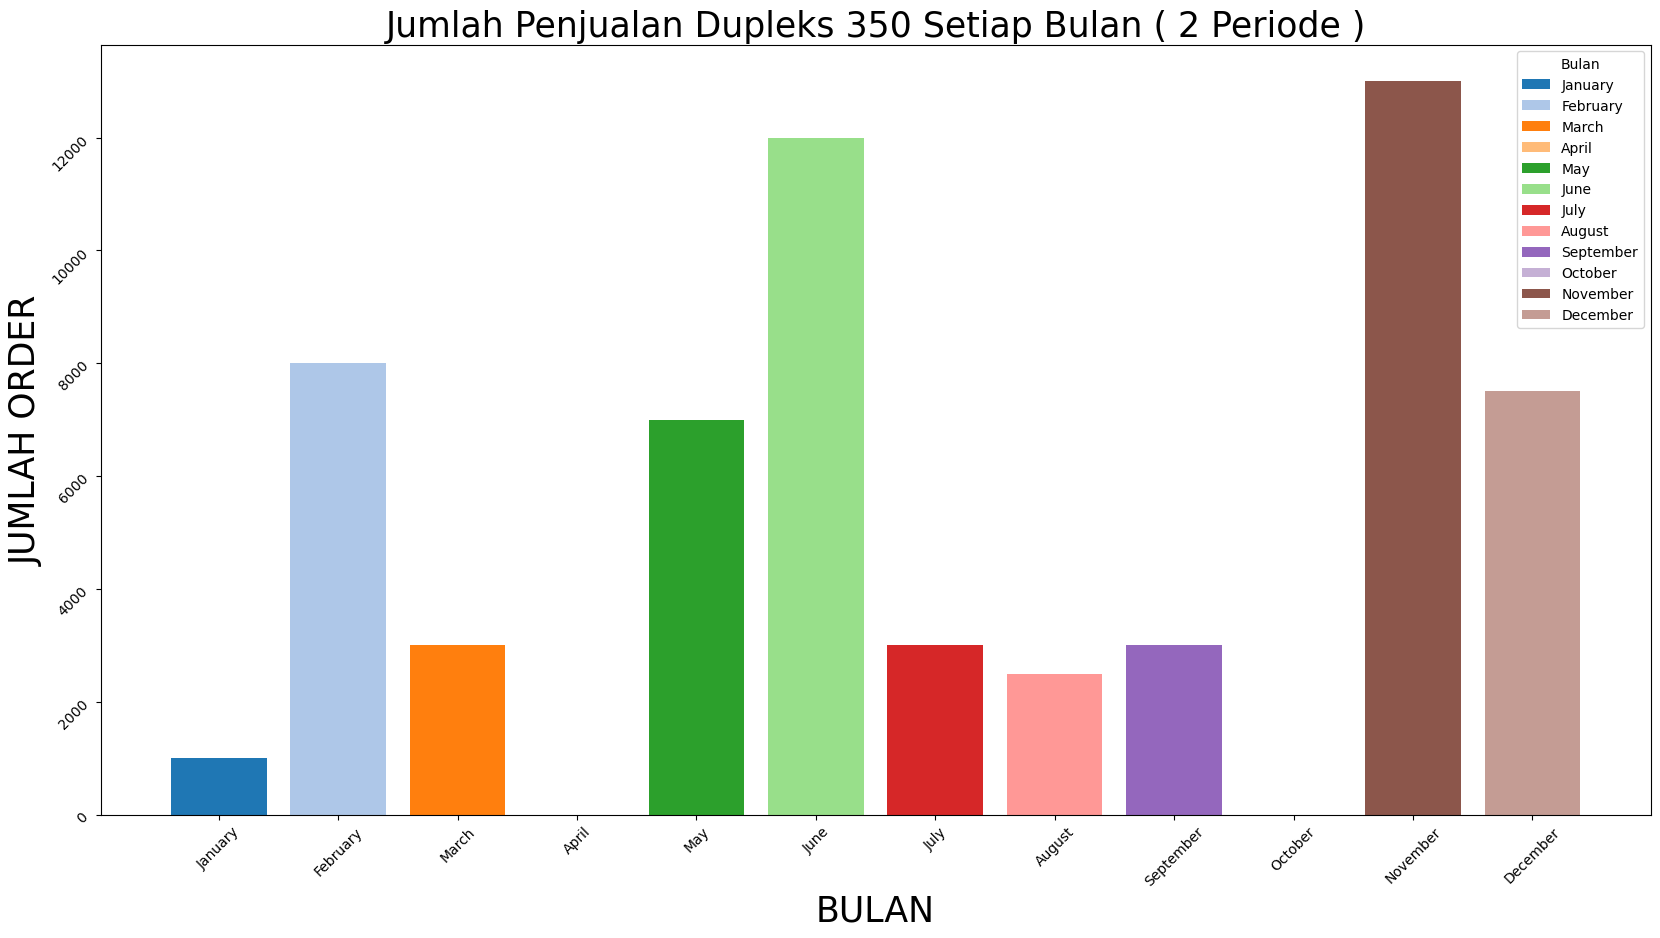

In [15]:
plt.figure(figsize=(20,10))
colors = plt.cm.tab20.colors
plt.bar(penjualan_bulanan.index, penjualan_bulanan["jumlah_penjualan"], label=penjualan_bulanan.index, color=colors[:len(penjualan_bulanan.index)])
plt.title("Jumlah Penjualan Dupleks 350 Setiap Bulan ( 2 Periode )",fontsize=25)
plt.xlabel("BULAN",fontsize=25)
plt.ylabel("JUMLAH ORDER",fontsize=25)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.legend(penjualan_bulanan.index, title="Bulan", loc="upper right")
plt.show()

In [16]:
#per tahun

produk_dupleks350_tahunan = produk_dupleks350.copy()

In [17]:
produk_dupleks350_tahunan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan
9,2022-09-08,Dupleks350,500,1800,900000,September
10,2022-09-08,Dupleks350,500,1800,900000,September
14,2022-11-08,Dupleks350,500,1800,900000,November
15,2022-11-08,Dupleks350,500,1800,900000,November
19,2022-12-08,Dupleks350,1000,2200,2200000,December
...,...,...,...,...,...,...
1059,2023-11-11,Dupleks350,1000,1700,1700000,November
1060,2023-11-11,Dupleks350,3500,2000,7000000,November
1061,2023-11-11,Dupleks350,3500,1900,6650000,November
1062,2023-11-11,Dupleks350,3000,1600,4800000,November


In [18]:
produk_dupleks350_tahunan["Tanggal"] = pd.to_datetime(produk_dupleks350_tahunan["Tanggal"])

In [19]:
produk_dupleks350_tahunan_2022 = produk_dupleks350_tahunan[produk_dupleks350_tahunan["Tanggal"].dt.year==2022]

In [20]:
produk_dupleks350_tahunan_2022

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan
9,2022-09-08,Dupleks350,500,1800,900000,September
10,2022-09-08,Dupleks350,500,1800,900000,September
14,2022-11-08,Dupleks350,500,1800,900000,November
15,2022-11-08,Dupleks350,500,1800,900000,November
19,2022-12-08,Dupleks350,1000,2200,2200000,December
56,2022-02-09,Dupleks350,2000,1500,3000000,February
72,2022-08-09,Dupleks350,500,5500,2750000,August
240,2022-02-12,Dupleks350,2000,1600,3200000,February
255,2022-07-12,Dupleks350,1000,2200,2200000,July


In [21]:
total_perbulan_2022 = produk_dupleks350_tahunan_2022.groupby("Bulan").agg(
jumlah_order_bulan_2022 = ("Jumlah Order","sum"),
jumlah_total_bulan_2022 = ("Total", "sum")
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [22]:
total_perbulan_2022

,jumlah_order_bulan_2022,jumlah_total_bulan_2022
Bulan,,
January,NaN,NaN
February,4000.0,6200000.0
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,1000.0,2200000.0
August,500.0,2750000.0
September,1000.0,1800000.0


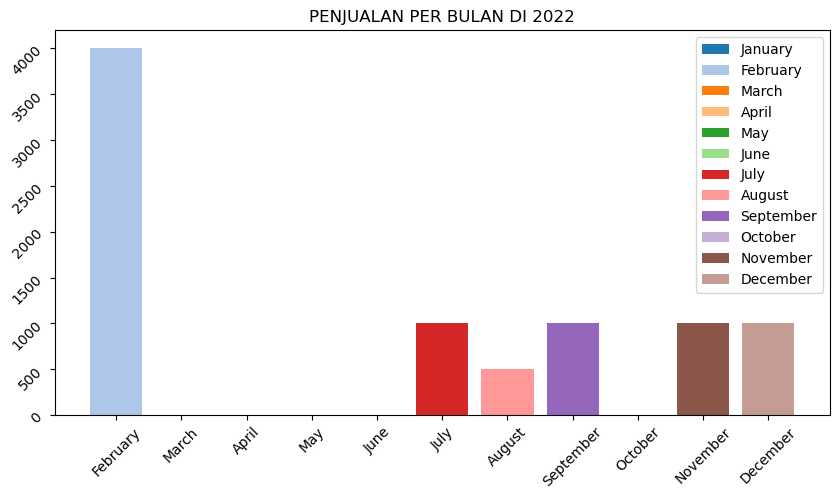

In [23]:
plt.figure(figsize=(10,5))

#seting warna
colors = plt.cm.tab20.colors

#setting barnya
plt.bar(total_perbulan_2022.index, total_perbulan_2022["jumlah_order_bulan_2022"],  label=total_perbulan_2022.index, color=colors[:len(total_perbulan_2022.index)])
plt.legend(total_perbulan_2022.index)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("PENJUALAN PER BULAN DI 2022")
plt.show()

In [24]:
#2023
produk_dupleks350_tahunan_2023 = produk_dupleks350_tahunan[produk_dupleks350_tahunan["Tanggal"].dt.year==2023]

In [25]:
produk_dupleks350_tahunan_2023

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan
313,2023-01-01,Dupleks350,1000,2250,2250000,January
352,2023-06-01,Dupleks350,2000,1975,3950000,June
354,2023-06-01,Dupleks350,2000,1600,3200000,June
373,2023-06-01,Dupleks350,1000,3000,3000000,June
374,2023-06-01,Dupleks350,1000,2650,2650000,June
375,2023-06-01,Dupleks350,500,3800,1900000,June
376,2023-06-01,Dupleks350,500,2600,1300000,June
379,2023-06-01,Dupleks350,1000,2000,2000000,June
438,2023-02-03,Dupleks350,2000,1975,3950000,February
446,2023-06-03,Dupleks350,2000,1600,3200000,June


In [26]:
total_perbulan_2023 = produk_dupleks350_tahunan_2023.groupby("Bulan").agg(
jumlah_order_bulan_2023 = ("Jumlah Order","sum"),
jumlah_total_bulan_2023 = ("Total", "sum")
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [27]:
total_perbulan_2023 

,jumlah_order_bulan_2023,jumlah_total_bulan_2023
Bulan,,
January,1000.0,2250000.0
February,4000.0,7950000.0
March,3000.0,6200000.0
April,NaN,NaN
May,7000.0,14500000.0
June,12000.0,24200000.0
July,2000.0,3200000.0
August,2000.0,3600000.0
September,2000.0,3950000.0


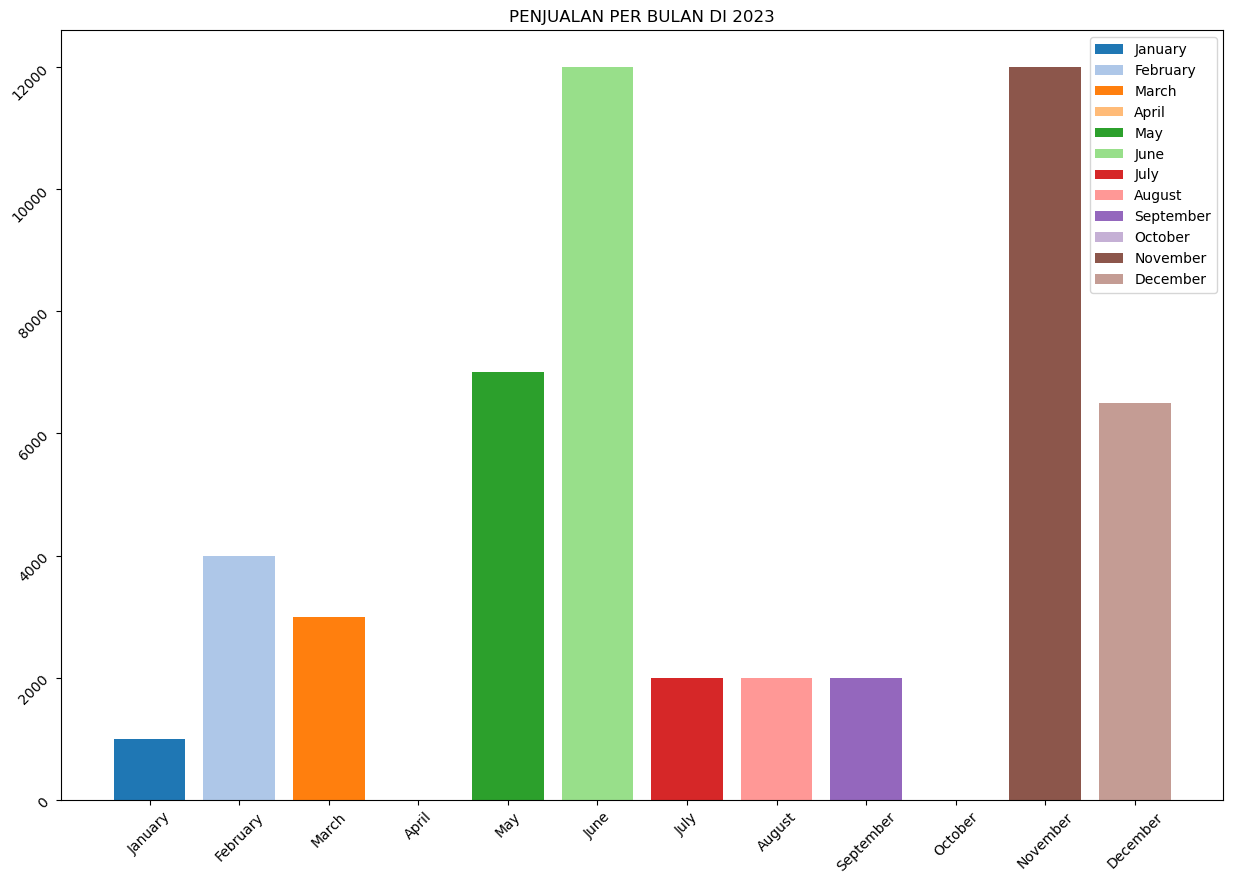

In [28]:
plt.figure(figsize=(15,10))

#seting warna
colors = plt.cm.tab20.colors

#setting barnya
plt.bar(total_perbulan_2023.index, total_perbulan_2023["jumlah_order_bulan_2023"],  label=total_perbulan_2023.index, color=colors[:len(total_perbulan_2023.index)])
plt.legend(total_perbulan_2023.index)
plt.title("PENJUALAN PER BULAN DI 2023")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()